For example, the file http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data contains data on concentrations of 13 different chemicals in wines grown in the same region in Italy that are derived from three different cultivars. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats





data = pd.read_csv("wine.data", header=None)
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names to be similar to R naming convention
data.V1 = data.V1.astype(str)
X = data.loc[:, "V2":]  # independent variables data
y = data.V1  # dependednt variable data
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [2]:
data['V1'].unique()

array(['1', '2', '3'], dtype=object)

C:\Users\Ilia\AppData\Local\Temp\ipykernel_15496\335988537.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['V13'])


<Axes: xlabel='V13', ylabel='Density'>

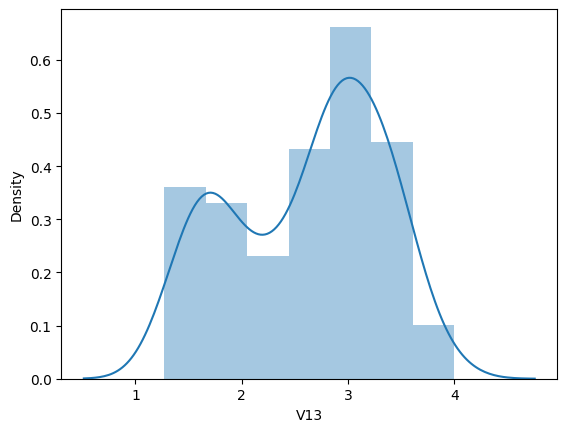

In [3]:
sns.distplot(data['V13'])

In [7]:
from sklearn.mixture import GaussianMixture


def component(data, columns, method):
    n = 1
    max_comp = 10
    x = []
    scores = []
    if data.shape[0] < max_comp:
        max_comp = data.shape[0]
    if len(columns) == 1:
        x = np.transpose([data[columns[0]].values])
    else:
        x = data[columns].values
    if method == "aic":
        lowest_aic = np.inf
        comp_lowest = 0
        for i in range(1, max_comp + 1, 1):
            gm1 = GaussianMixture(n_components=i, random_state=0)
            gm1.fit(x)
            aic1 = gm1.aic(x)
            scores.append(aic1)
            if aic1 < lowest_aic:
                lowest_aic = aic1
                comp_lowest = i
            n = comp_lowest

    if method == "bic":
        lowest_bic = np.inf
        comp_lowest = 0
        for i in range(1, max_comp + 1, 1):
            gm1 = GaussianMixture(n_components=i, random_state=0)
            gm1.fit(x)
            bic1 = gm1.bic(x)
            scores.append(bic1)
            if bic1 < lowest_bic:
                lowest_bic = bic1
                comp_lowest = i
            n = comp_lowest
    return n, scores

In [8]:
n, scores = component(data, ['V13'], 'bic')

In [9]:
n

2

Text(0, 0.5, '-LL')

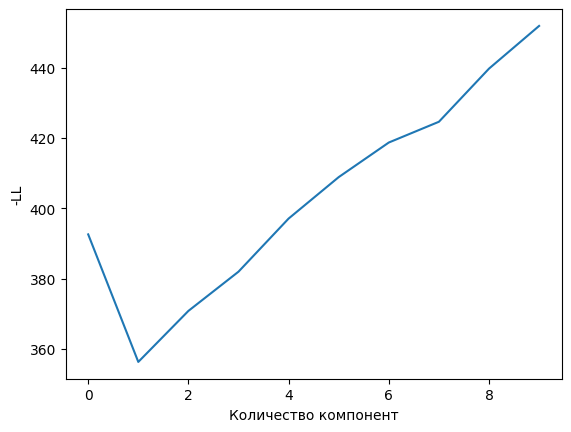

In [11]:
plt.plot([i for i in range(len(scores))], scores)
plt.xlabel('Количество компонент')
plt.ylabel('-LL')

In [12]:
gmm = GaussianMixture(n_components=2).fit(data[['V13']].values)

In [13]:
gmm.means_

array([[1.72965838],
       [3.03442195]])

In [14]:
gmm.covariances_

array([[[0.07894911]],

       [[0.15208655]]])

In [15]:
gmm.weights_

array([0.32399476, 0.67600524])

In [16]:
data['components'] = gmm.predict(data[['V13']].values)
samples0 = data.loc[data['components'] == 0]['V13'].values
samples1 = data.loc[data['components'] == 1]['V13'].values

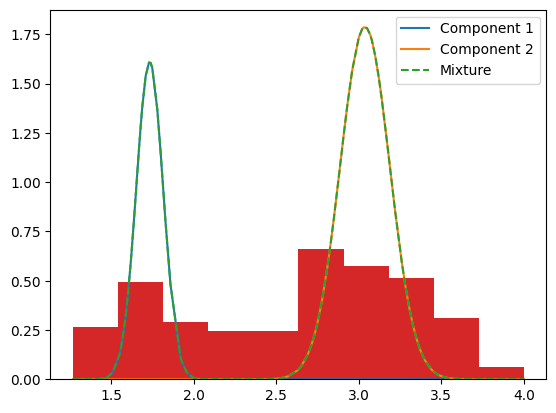

In [17]:
# define your distributions
d1 = stats.norm(1.73413481, 0.08100614)
d2 = stats.norm(3.03743301, 0.15026521)

# set mixture component weights
mc = [0.32666938, 0.67333062]
mc = mc / np.sum(mc) # ensuring they sum to 1

# where to evaluate the densities
x = sorted(data['V13'].values)
# calculate density and apply mixture weights
c1 = d1.pdf(x) * mc[0]
c2 = d2.pdf(x) * mc[1]

# plot everything
plt.plot(x, c1, label='Component 1')
plt.plot(x, c2, label='Component 2')
plt.plot(x, c1 + c2, '--', label='Mixture')
plt.hist(data['V13'].values, density=True)
plt.legend()

## Bootstrap distribution estimation

In [18]:
import numpy as np
 
ages = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
 
num_samples = 1000
 
bootstrap_means = np.zeros(num_samples)
 
# Perform bootstrap sampling
for i in range(num_samples):
 
    bootstrap_sample = np.random.choice(ages, size=len(ages), replace=True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means[i] = bootstrap_mean
 
estimated_mean = np.mean(bootstrap_means)
estimated_std = np.std(bootstrap_means, ddof=1)
 
 
print("Estimated population mean age:", estimated_mean)
print("Standard error of the estimate:", estimated_std)

Estimated population mean age: 47.418
Standard error of the estimate: 4.432541418128365


In [19]:
import numpy as np
 
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
num_samples = 1000
 
bootstrap_means = np.zeros(num_samples)
 
# Perform bootstrap sampling
for i in range(num_samples):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means[i] = bootstrap_mean
 
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
estimated_mean = np.mean(bootstrap_means)
estimated_std = np.std(bootstrap_means, ddof=1)
 
 
print("Estimated population mean:", estimated_mean)
print("Standard error of the estimate:", estimated_std)
 
print("95% Confidence interval:", confidence_interval)

Estimated population mean: 55.098
Standard error of the estimate: 8.70977934601424
95% Confidence interval: [38. 72.]


In [20]:
import scipy.stats as stats
mean = np.mean(data)
var = np.var(data)
std = np.std(data)
norm_q95 = stats.norm.ppf(0.95)
mean_conf = norm_q95 * std / np.sqrt(len(data))

# Calculation of 95% confidence intervals for variance and standard deviation
chi2_q95_left = stats.chi2.ppf((1 - 0.05 / 2.0), df=len(data) - 1)
chi2_q95_right = stats.chi2.ppf(0.05 / 2.0, df=len(data) - 1)

var_conf_left = var * (len(data) - 1) / chi2_q95_left
var_conf_right = var * (len(data) - 1) / chi2_q95_right
std_conf_left = np.sqrt(var_conf_left)
std_conf_right = np.sqrt(var_conf_right)


print("Sample mean: %0.3f +/- %0.3f" % (mean, mean_conf))
print("95%% Confidence interval of sample variance : (%0.3f; %0.3f)"
      % (var_conf_left, var_conf_right))
print("95%% Confidence interval of sample standard deviation: (%0.3f; %0.3f)"
      % (std_conf_left, std_conf_right))

Sample mean: 55.000 +/- 14.940
95% Confidence interval of sample variance : (390.322; 2749.603)
95% Confidence interval of sample standard deviation: (19.757; 52.437)


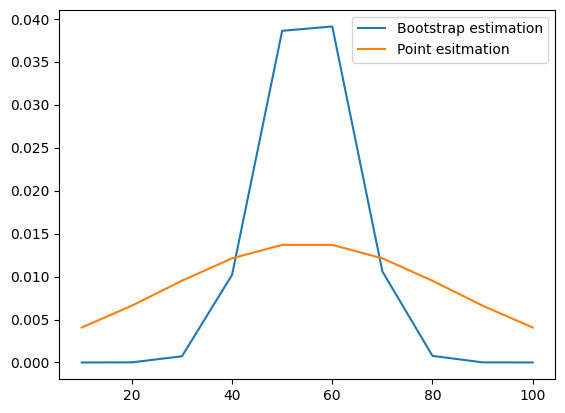

In [21]:
d1 = stats.norm(estimated_mean, estimated_std)
d2 = stats.norm(mean, std)

x = sorted(data)
# calculate density and apply mixture weights
c1 = d1.pdf(x)
c2 = d2.pdf(x)

# plot everything
plt.plot(x, c1, label='Bootstrap estimation')
plt.plot(x, c2, label='Point esitmation')
#plt.hist(data, density=True)
plt.legend()

## Comparision two means

In [36]:
import pandas as pd

data = 'https://gist.githubusercontent.com/baskaufs/1a7a995c1b25d6e88b45/raw/4bb17ccc5c1e62c27627833a4f25380f27d30b35/t-test.csv'
df = pd.read_csv(data)

df.head()

,grouping,height
0,men,181.5
1,men,187.3
2,men,175.3
3,men,178.3
4,men,169.0


In [37]:
male = df.query('grouping == "men"')['height']
female = df.query('grouping == "women"')['height']

    Null hypotheses: Two group means are equal
    Alternative hypotheses: Two group means are different (two-tailed)

Assumption 1: Are the two samples independent?

Assumption 2: Are the two groups’ data following a normal distribution?

Assumption 3: Do the two samples have the same variances (Homogeneity of Variance)?

In [38]:
df.groupby('grouping').describe()

height                                                           
          count        mean       std    min     25%    50%     75%    max
grouping                                                                  
men         7.0  179.871429  6.216836  169.0  176.80  181.5  183.85  187.3
women       7.0  171.057143  5.697619  165.2  166.65  170.3  173.75  181.1

In [39]:
stats.shapiro(male)

ShapiroResult(statistic=np.float64(0.9550847949572829), pvalue=np.float64(0.7756238221291043))

In [40]:
stats.shapiro(female)

ShapiroResult(statistic=np.float64(0.9197604725000855), pvalue=np.float64(0.4675335779005911))

In [41]:
res = stats.ttest_ind(male, female, 
                      equal_var=True)

display(res)

TtestResult(statistic=np.float64(2.765444762721087), pvalue=np.float64(0.01710570152816618), df=np.float64(12.0))

## Correlation analysis

Once you have read a multivariate data set into python, the next step is usually to make a plot of the data.
One common way of plotting multivariate data is to make a matrix scatterplot, showing each pair of variables plotted against each other.

In [43]:
df

,grouping,height
0,men,181.5
1,men,187.3
2,men,175.3
3,men,178.3
4,men,169.0
5,men,183.2
6,men,184.5
7,women,175.4
8,women,172.1
9,women,181.1


In this matrix scatterplot, the diagonal cells show histograms of each of the variables, in this case the concentrations of the first five chemicals (variables V2, V3, V4, V5, V6).

Each of the off-diagonal cells is a scatterplot of two of the five chemicals, for example, the second cell in the first row is a scatterplot of V2 (y-axis) against V3 (x-axis).

If you see an interesting scatterplot for two variables in the matrix scatterplot, you may want to plot that scatterplot in more detail, with the data points labelled by their group (their cultivar in this case).

Another type of plot that is useful is a profile plot, which shows the variation in each of the variables, by plotting the value of each of the variables for each of the samples.

In [44]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 # covariance for this group
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw

In [45]:
calcWithinGroupsCovariance(X.V8, X.V11, y)

np.float64(0.28667830215140194)

In [46]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    Covb /= numlevels - 1
    return Covb

In [47]:
calcBetweenGroupsCovariance(X.V8, X.V11, y)

np.float64(-60.41077483591621)

Thus, for V8 and V11, the between-groups covariance is -60.41 and the within-groups covariance is 0.29. Since the within-groups covariance is positive (0.29), it means V8 and V11 are positively related within groups: for individuals from the same group, individuals with a high value of V8 tend to have a high value of V11, and vice versa. Since the between-groups covariance is negative (-60.41), V8 and V11 are negatively related between groups: groups with a high mean value of V8 tend to have a low mean value of V11, and vice versa.

In [48]:
corr = stats.pearsonr(X.V2, X.V3)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.21008198597074354
cor:		 0.09439694091041403


This tells us that the correlation coefficient is about 0.094, which is a very weak correlation. Furthermore, the p-value for the statistical test of whether the correlation coefficient is significantly different from zero is 0.21. This is much greater than 0.05 (which we can use here as a cutoff for statistical significance), so there is very weak evidence that that the correlation is non-zero.

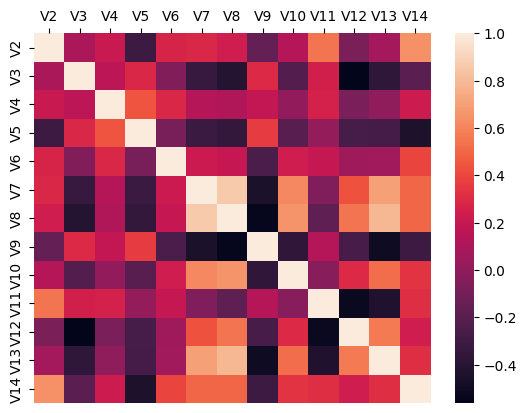

In [49]:
corrmat = X.corr()
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [52]:
import scipy.stats as stats

print(stats.spearmanr(X.V3, X.V2))

SignificanceResult(statistic=np.float64(0.1404301775567423), pvalue=np.float64(0.06153270929535729))
